# Cafe sales Analysis Using EDA
> This project explores the sales of different menu items using a dataset. We perform data cleaning, Exploratory Data Analysis (EDA) analyse the sales report of cafe.
---

# Data Description
The dataset used here is dirty_cafe_sales.csv from **Kaggle**. It cantains almost 10 menu items, 10000 records and 8 columns:

- **Transaction id**
- **Item**
- **Quantity**
- **Price Per Unit**
- **Total Spent**
- **Payment Method**
- **Location**
- **Transaction Date**

Goal: To analyse the sales of cafe for usefull insights.

---

### Step 1: Load and Preview Tha dataset

We start by loading the dataset and dropping the unnecessary columns like **Transaction Id**, **Payment Methond**,  **Location**, and **Transaction Date** Because they are not important in final report.   

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore Warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = 'ignore', category = FutureWarning)

# Loading the dataset
df = pd.read_csv('../Datasets/dirty_cafe_sales.csv')

# Dropping useless columns
df.drop('Transaction ID', inplace= True, axis=1)
df.drop('Payment Method', inplace= True, axis=1)
df.drop('Location', inplace= True, axis=1)
df.drop('Transaction Date', inplace= True, axis=1)

### Step 2: Check the data structure
We check for missing values and data types to understand the structure.

In [26]:
# Basic info and null check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7732 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Item            7732 non-null   category
 1   Quantity        7732 non-null   int64   
 2   Price Per Unit  7732 non-null   float64 
 3   Total Spent     7732 non-null   float64 
dtypes: category(1), float64(2), int64(1)
memory usage: 249.5 KB


### Step 3: Handling error values and converting columns into other data types

We will remove the error values of the dataset. Convert the **Item** column into Category datatype, **Quantity**, **Price Per Unit**, **Total Spent** into float datatype also remove the non-numeric characters.  

In [27]:
# Converting items into Category
objcat = ['Item', 'Embarked']
for item in objcat:
    df['Item'] = df['Item'].astype('category')

# Dropping empty rows and error unknown values
df.replace(['ERROR', 'UNKNOWN'], np.nan, inplace= True)
df.dropna(inplace= True)

# Handling non-numeric values and coveting columns datatypes
for col in ['Quantity', 'Price Per Unit', 'Total Spent']:
    # Remove any non-numeric characters
    df[col] = df[col].astype(str).str.replace(r'[^\d.]', '', regex=True)
    
    # Convert to float and handle empty strings
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)


---

## EDA with Plots for important Interpretations

### Step 3: Visualizing the dataset for usefull insights

In this step we will make some graphs to get important info about the cafe sales. We are using different plots like:

- **Heatmap:** To check missing values
- **histogram:** To get graph of qunatity of each Item ordered
- **Pie chart:** To view contibution of each item total sales
- **Bar plot:** Total revenue per Item
- **Point plot:** Average transaction value per Item
- **Box plot:** Spending Distribution per Item

#### 1. Heatmap:

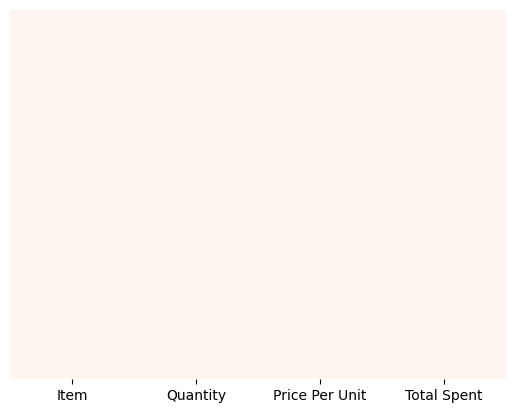

In [21]:
# Plotting heatmap
sns.heatmap(df.isnull(), yticklabels= False,cbar=False, cmap='Reds')
plt.show()

Heatmap show that we have cleaned the dataset efficiently and we have no missing values. 

#### 2. Histogram:

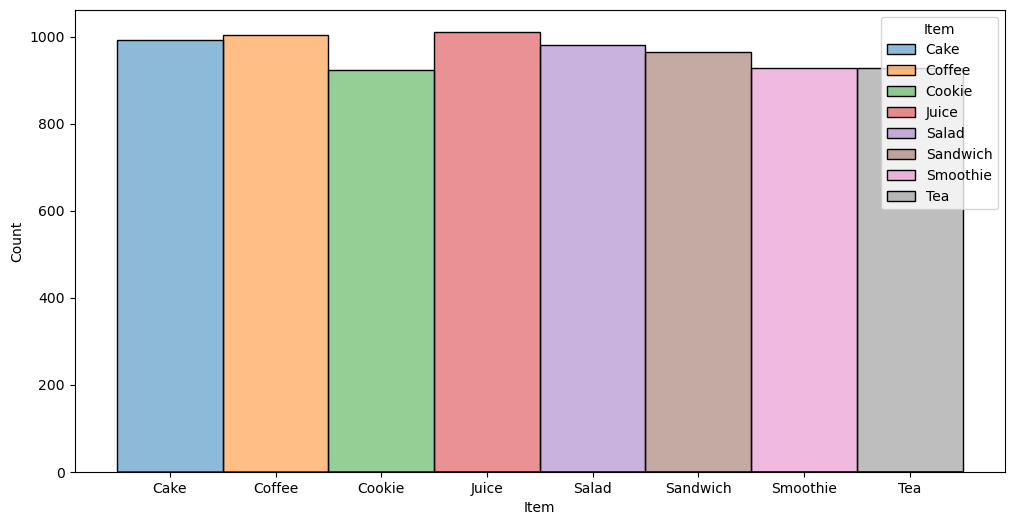

In [49]:
# Plotting histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df,x='Item', bins=8, hue='Item')
plt.show()

This histogram shows the ditribution of each menu Item.

#### 3. Pie chart:

**For Quantity sold per Item**

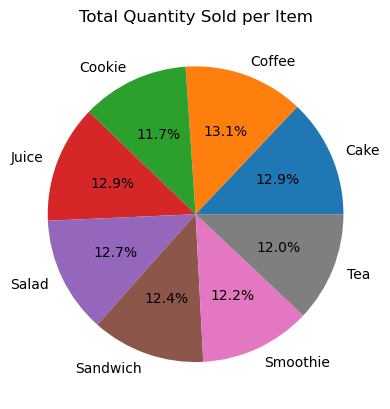

In [50]:
quantity_per_item = df.groupby('Item')['Quantity'].sum().reset_index()

# Plotting Pie chart for total quantity of each item
plt.pie(quantity_per_item['Quantity'], 
        labels=quantity_per_item['Item'],
        autopct='%1.1f%%')
plt.title('Total Quantity Sold per Item')
plt.show()

**For sales per Item**

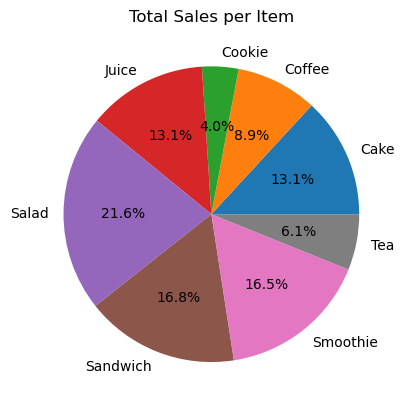

In [51]:
sales_per_item = df.groupby('Item')['Total Spent'].sum().reset_index()

# Plotting Pie chart for sales per item
plt.pie(sales_per_item['Total Spent'],
        labels=sales_per_item['Item'],
        autopct='%1.1f%%')
plt.title('Total Sales per Item')
plt.show()

Pie chart shows the quantity and sales per menu Item.

#### 4. Bar plot:

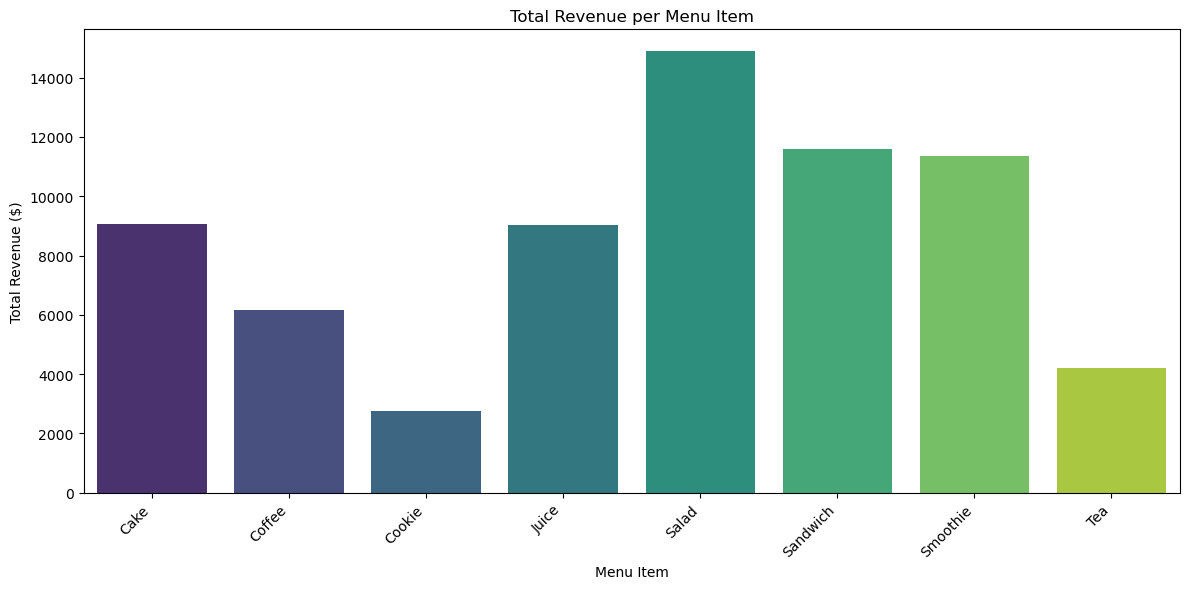

In [ ]:
# Calculate total revenue per item
revenue_per_item = df.groupby('Item')['Total Spent'].sum().reset_index()

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Item',
    y='Total Spent',
    data=revenue_per_item.sort_values('Total Spent', ascending=False),
    palette='viridis'
)
plt.title('Total Revenue per Menu Item')
plt.xlabel('Menu Item')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Bar plot is best for showing overall revenue.

#### 5. Point plot:

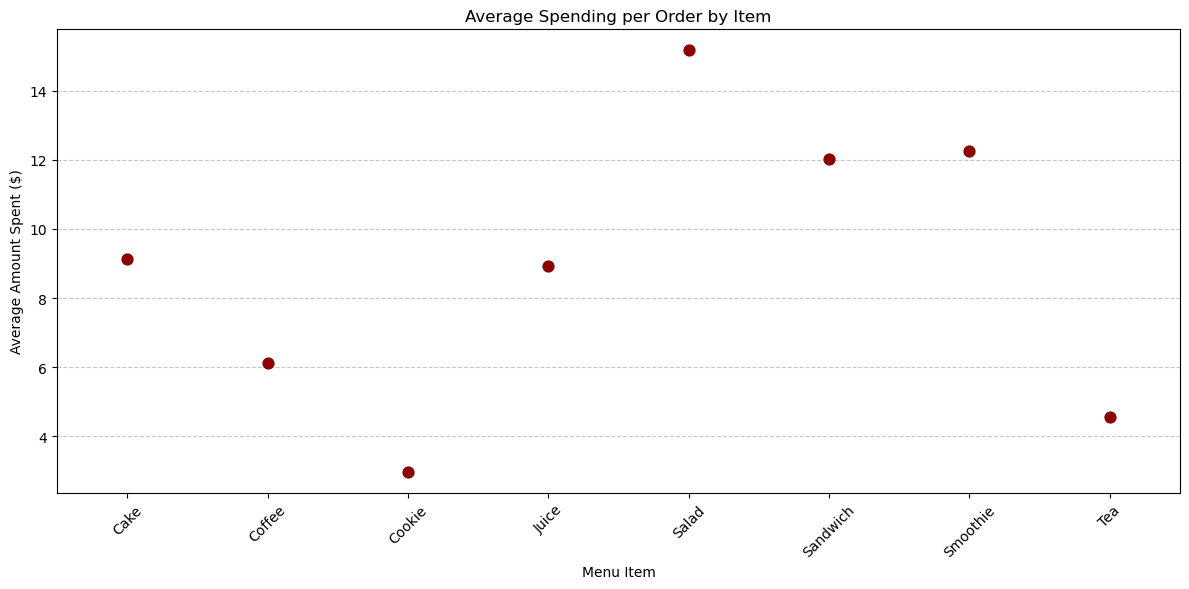

In [ ]:
# Plotting point plot
plt.figure(figsize=(12, 6))
sns.pointplot(
    x='Item',
    y='Total Spent',
    data=df,
    estimator='mean',
    errorbar=None,
    color='darkred',
    join=False
)
plt.title('Average Spending per Order by Item')
plt.xlabel('Menu Item')
plt.ylabel('Average Amount Spent ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Point plot shows average spending when ordering each item.

#### 6. Box plot:

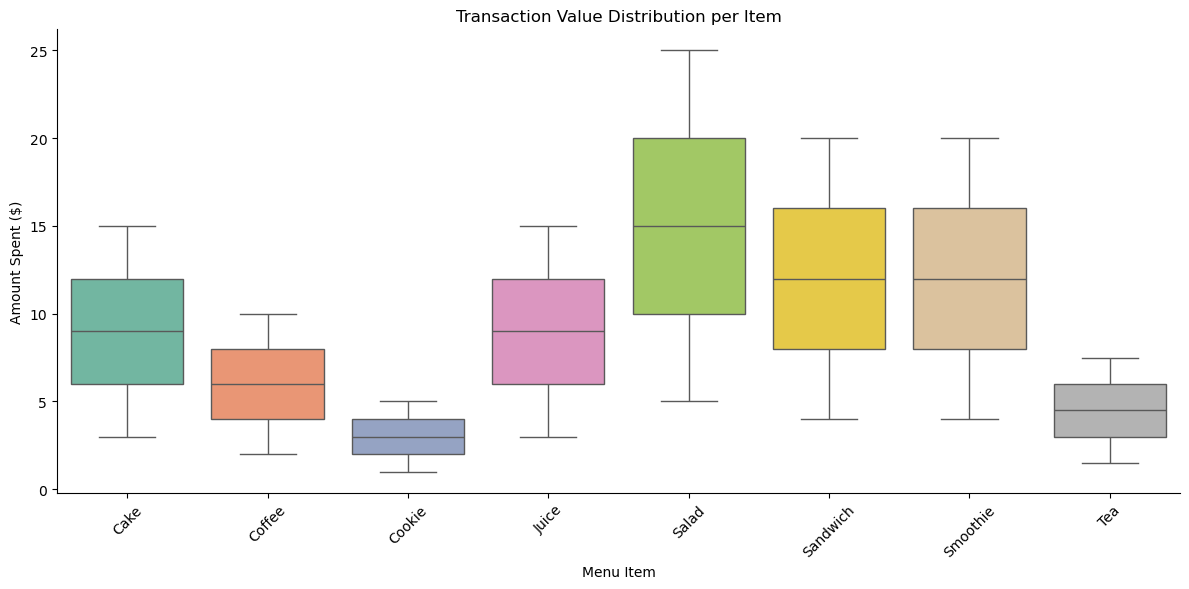

In [ ]:
# Plotting Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Item',
    y='Total Spent',
    data=df,
    showfliers=False,  # Hide outliers
    palette='Set2'
)
plt.title('Transaction Value Distribution per Item')
plt.xlabel('Menu Item')
plt.ylabel('Amount Spent ($)')
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

Box plot reveals transaction patterns and outliers.

#### **Plots with properties:**

| **Plot Type** | **What it shows**                                            | **Best For**
| :-------------| :----------------------------------------------------------- | :-------------
| **Heatmap**   | Missing values in dataset                                    | Quickly identifying columns/rows with data quality issues
| **Histogram** | Distribution of numeric values                               | Understanding value ranges and spotting outliers
| **Pie chart** | Percentage contribution of each menu item to total sales     | Visualizing market share of products at a glance
| **Bar plot**  | Total revenue generated by each menu item                    | Identifying top-selling products and revenue drivers
| **Point plot**| Average spending per transaction for each item               | Menu pricing analysis and comparing per-item transaction values
| **Box plot**  | Spending distribution, median, and range for each item       | Identifying popular order sizes and detecting unusual spending patterns


### Step 4: Save the cleaned dataset

In [55]:
# Saving the cleaned dataset into csv
df.to_csv('cleaned_data.csv', index=True)

## 🔍 Final Findings:

- Each menu item is ordered almost **equal number** of times.
- The most expensive Item is **salad**. 
- **Coffee** has the highest quantity ordered.
- The cheapest Item of menu is **cookie**.

